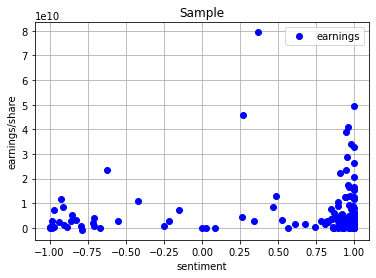

[7.24418760e+19 7.18848889e+19 7.13449789e+19 7.08216191e+19
 7.03142985e+19 6.98225222e+19 6.93458106e+19 6.88836986e+19
 6.84357359e+19 6.80014859e+19 6.75805253e+19 6.71724442e+19
 6.67768453e+19 6.63933434e+19 6.60215653e+19 6.56611495e+19
 6.53117453e+19 6.49730131e+19 6.46446239e+19 6.43262585e+19
 6.40176079e+19 6.37183724e+19 6.34282617e+19 6.31469944e+19
 6.28742980e+19 6.26099080e+19 6.23535685e+19 6.21050313e+19
 6.18640558e+19 6.16304089e+19 6.14038649e+19 6.11842048e+19
 6.09712164e+19 6.07646941e+19 6.05644388e+19 6.03702574e+19
 6.01819627e+19 5.99993733e+19 5.98223136e+19 5.96506133e+19
 5.94841072e+19 5.93226355e+19 5.91660431e+19 5.90141798e+19
 5.88669001e+19 5.87240627e+19 5.85855311e+19 5.84511727e+19
 5.83208590e+19 5.81944657e+19 5.80718721e+19 5.79529614e+19
 5.78376202e+19 5.77257388e+19 5.76172108e+19 5.75119332e+19
 5.74098059e+19 5.73107322e+19 5.72146182e+19 5.71213730e+19
 5.70309084e+19 5.69431391e+19 5.68579822e+19 5.67753575e+19
 5.66951873e+19 5.661739

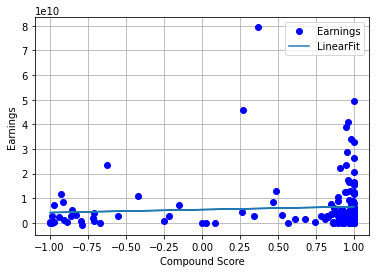

In [90]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt




import pandas as pd 

data = pd.read_csv("sa.csv")  


titleSentiments = []

data.head()

for i in data["Title Compound Score"]:
    if i >= 0.05:
        titleSentiments.append("positive")
    elif i <= -0.05:
        titleSentiments.append("negative")
    else:
        titleSentiments.append("neutral")
data["titleSentiments"] = titleSentiments

bodySentiment = []


for i in data["Body Compound Score"]:
    if i > 0.0:
        bodySentiment.append("positive")
    elif i < 0.0:
        bodySentiment.append("negative")
    else:
        bodySentiment.append("neutral")
data["bodySentiment"] = bodySentiment


financialData = pd.read_csv("s-and-p-500-companies-financials_zip/data/constituents-financials_csv.csv")
financialData. dropna()
symbols = financialData["Symbol"].tolist()



data['Body S&P 500 + GME Tickers'] = data['Body S&P 500 + GME Tickers'].apply(lambda x: x.split(','))



data.head()
list2 = [""] * len(symbols)




for i in range(len(data)):
    for j in range(len(data['Body S&P 500 + GME Tickers'][i])):
        if data['Body S&P 500 + GME Tickers'][i][j] in symbols:
            
            
            compound = data.iloc[i]['Body Compound Score']
            positiveScore = data.iloc[i]['Body Positive Score']
            index = symbols.index(data['Body S&P 500 + GME Tickers'][i][j])
            list2[index] = compound



financialData['compoundScore'] = list2


nan_value = float("NaN")
financialData.replace("", nan_value, inplace=True)


    
financialData.dropna(subset = ["compoundScore"], inplace=True)

	


subData = financialData[['compoundScore', 'EBITDA']]
subData





X = financialData[['compoundScore']].values
y = financialData['EBITDA'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)







plt.plot(X,y,'bo')
plt.ylabel('earnings/share')
plt.xlabel('sentiment')
plt.legend(['earnings'])
plt.title('Sample')
plt.grid()
plt.show()



m = np.size(y)
X = X.reshape([len(financialData),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])



def gradient(x,y,theta, iterations=1000, learning_rate=0.01):
    
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for i in range(iterations):
        predict = np.dot(x,theta)
        theta = theta - (1/len(y)) * learning_rate * (x.T.dot(predict - y))
        theta_history[i,:] = theta.T
        cost_history[i] = compute_cost(x,y,theta)
    return theta, cost_history
theta , J = gradient(x,y,theta)
print(J)


#plot linear fit for our theta
plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')

plt.ylabel('Earnings')
plt.xlabel('Compound Score')
plt.legend(['Earnings','LinearFit'])
plt.grid()
plt.show()




